# E-Commerce Case Study

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:.2f}".format
import datetime as dt
import seaborn as sns


sns.set_context('talk')
import scipy.stats as stats


# set seaborn graphs to a better style
sns.set(style="ticks")

# for better visualization
plt.style.use('ggplot')


#Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
sellers = pd.read_csv('SELLERS.csv')
products = pd.read_csv('PRODUCTS.csv')
order_payments = pd.read_csv('ORDER_PAYMENTS.csv')
order_review_ratings = pd.read_csv('ORDER_REVIEW_RATINGS.csv')
orders = pd.read_csv('ORDERS.csv')
order_items = pd.read_csv('ORDER_ITEMS.csv')
geolocation = pd.read_csv('GEO_LOCATION.csv')
customers = pd.read_csv('CUSTOMERS.csv')

In [7]:
value=order_payments.groupby('order_id').payment_value.sum().reset_index()
avg=order_review_ratings.groupby('order_id').review_score.mean().reset_index()
data=orders.merge(value,on='order_id')
data=data.merge(customers,on='customer_id')
data=data.merge(order_items,how='left',on='order_id')
data=data.merge(products,how='left',on='product_id')
data=data.merge(sellers,how='left',on='seller_id')
data=data.merge(avg,how='left',on='order_id')
data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,customer_unique_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,38.71,7c396fd4830fd04220f754e42b4e5bff,...,268.00,4.00,500.00,19.00,8.00,13.00,9350.00,Chhuikhadan,Chhattisgarh,4.00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,141.46,af07308b275d755c9edb36a90c618231,...,178.00,1.00,400.00,19.00,13.00,19.00,31570.00,Anantapur,Andhra Pradesh,4.00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,179.12,3a653a41f6f9fc3d2a113cf8398680e8,...,232.00,1.00,420.00,24.00,19.00,21.00,14840.00,Freelandgunj,Gujarat,5.00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00,72.20,7c142cf63193a1473d2e66489a9ae977,...,468.00,3.00,450.00,30.00,10.00,20.00,31842.00,Anantapur,Andhra Pradesh,5.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00,28.62,72632f0f9dd73dfee390c9b22eb56dd6,...,316.00,4.00,250.00,51.00,15.00,15.00,8752.00,Akkayapalle,Andhra Pradesh,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113417,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2/6/2018 12:58,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00,195.00,da62f9e57a76d978d02ab5362c509660,...,828.00,4.00,4950.00,40.00,10.00,40.00,17602.00,Mancherial,Andhra Pradesh,4.00
113418,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,8/27/2017 14:46,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00,271.01,737520a9aad80b3fbbdad19b66b37b30,...,500.00,2.00,13300.00,32.00,90.00,22.00,8290.00,Akkarampalle,Andhra Pradesh,5.00
113419,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,441.16,5097a5312c8b157bb7be58ae360ef43c,...,1893.00,1.00,6550.00,20.00,20.00,20.00,37175.00,Dalurband,West Bengal,2.00
113420,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,441.16,5097a5312c8b157bb7be58ae360ef43c,...,1893.00,1.00,6550.00,20.00,20.00,20.00,37175.00,Dalurband,West Bengal,2.00


In [7]:
data=data.drop(columns=['order_approved_at','order_delivered_carrier_date','order_estimated_delivery_date','order_delivered_customer_date','shipping_limit_date','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_height_cm','product_width_cm','seller_city','seller_state','seller_zip_code_prefix'])
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,1.00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,Housewares,4.00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,141.46,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh,1.00,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,Perfumery,4.00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh,1.00,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,Auto,5.00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,72.20,7c142cf63193a1473d2e66489a9ae977,59296,Kartarpur,Punjab,1.00,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,Pet_Shop,5.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,Bheemavaram,Andhra Pradesh,1.00,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,Stationery,5.00


In [8]:
data.order_purchase_timestamp=pd.to_datetime(data.order_purchase_timestamp)
data['year']=data.order_purchase_timestamp.dt.year
data['month']=data.order_purchase_timestamp.dt.month_name()
data['week']=data.order_purchase_timestamp.dt.weekofyear
data['time']=data.order_purchase_timestamp.dt.time
data['day']=data.order_purchase_timestamp.dt.date
data['month_year']=data.order_purchase_timestamp.dt.date.astype(str).str[0:7]
data['price_to_pay']=data['price']+data['freight_value']
data.duplicated(['order_id','product_id','order_item_id']).sum()


0

# 1. Perform Detailed exploratory analysis


# a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [9]:
product['product_category_name'].nunique()

71

In [10]:
product['product_id'].nunique()

32951

In [11]:
order_items['price_to_pay']=order_items['price']+order_items['freight_value']
order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_to_pay
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87,216.87


In [12]:
order_items.price_to_pay.sum()

15843553.24

In [13]:
order_items.order_item_id.count()

112650

In [14]:
customers['customer_zip_code_prefix'].nunique()

14994

In [15]:
sellers['seller_id'].count()

3095

In [16]:
order_payments['payment_type'].value_counts()

credit_card    76795
UPI            19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [17]:
len(order_payments['payment_type'].value_counts())

5

# b. Understanding how many new customers acquired every month


In [19]:
cus=data.groupby(['order_id','customer_id']).last().reset_index()
customer_count=cus.groupby(['month_year',cus.customer_id.rename('customer')]).customer_id.count().reset_index()
firstpurchase=b.groupby('customer_id').month_year.min().reset_index().rename(columns={'customer_id':'customer','month_year':'first_purchase_month'})
cus_final=customer_count.merge(firstpurchase,on='customer')
cus_final.customer_id=np.where(cus_final.month_year==cus_final.first_purchase_month,'New','Old')
cus_final.head()

,month_year,customer,customer_id,first_purchase_month
0,2016-09,08c5351a6aca1c1589a38f244edeee9d,New,2016-09
1,2016-09,622e13439d6b5a0b486c435618b2679e,New,2016-09
2,2016-09,683c54fc24d40ee9f8a6fc179fd9856c,New,2016-09
3,2016-10,00474d2582fd72663036795b7ab8cfc1,New,2016-10
4,2016-10,01415cfeb907d8ce0e17075b4c097fe9,New,2016-10


In [20]:
cus_final.query('customer_id=="New"').groupby('month_year').customer_id.count()

month_year
2016-09       3
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Name: customer_id, dtype: int64

# c. Understand the retention of customers on month on month basis

In [24]:
cus_final.customer_id.value_counts()

New    99440
Name: customer_id, dtype: int64

In [25]:
data.customer_id.nunique()

99440

In [26]:
data.order_id.nunique()

99440

# d.how the revenues from existing/new customers on month on month basis¶

In [21]:
cust = data.drop_duplicates('customer_id')

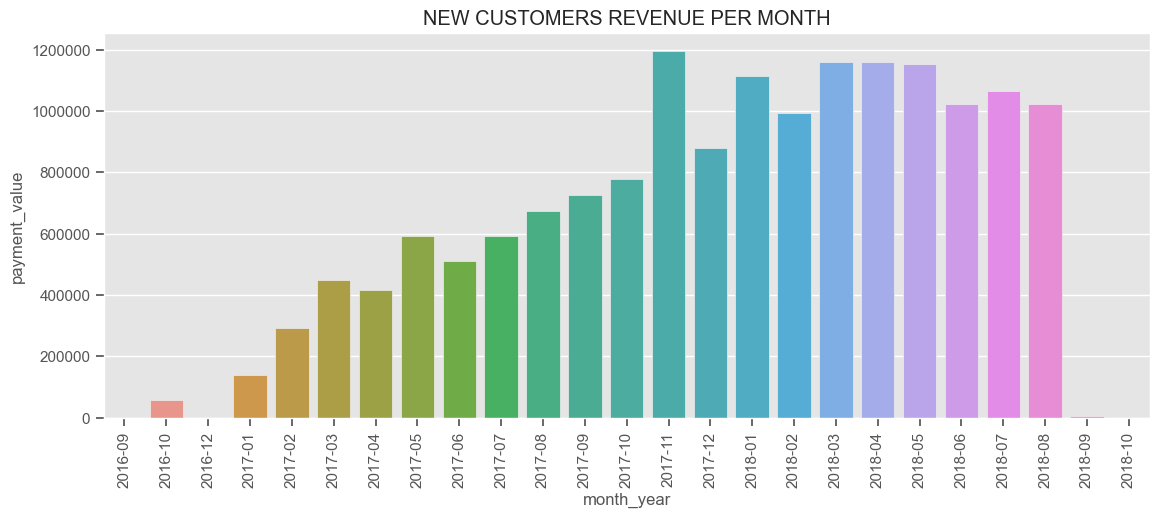

In [23]:
mon=cust.groupby('month_year').payment_value.sum().reset_index()
plt.figure(figsize=(13.5,5))
sns.barplot(mon.month_year,mon.payment_value)
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain',axis='y')
plt.title('NEW CUSTOMERS REVENUE PER MONTH')
plt.show()

# e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

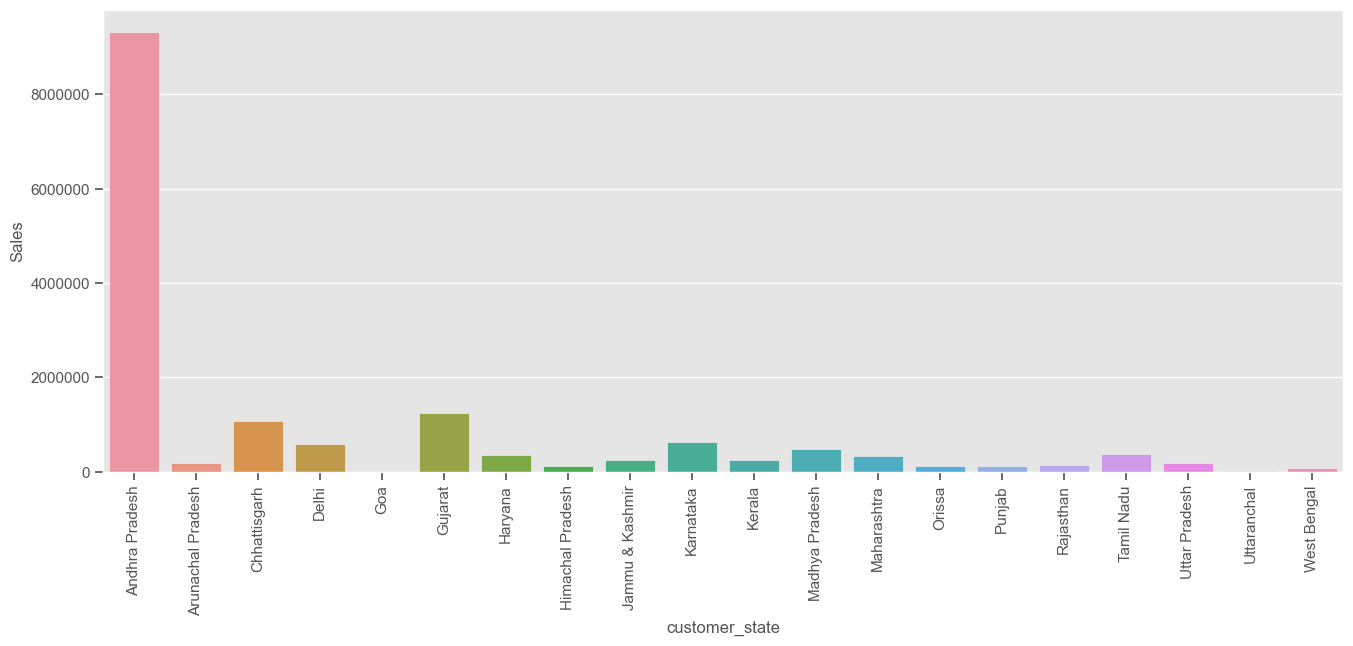

In [27]:
cus_details=data.groupby('customer_state').price_to_pay.sum().reset_index()
plt.figure(figsize=(16,6))
sns.barplot(cus_details.customer_state,cus_details.price_to_pay)
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

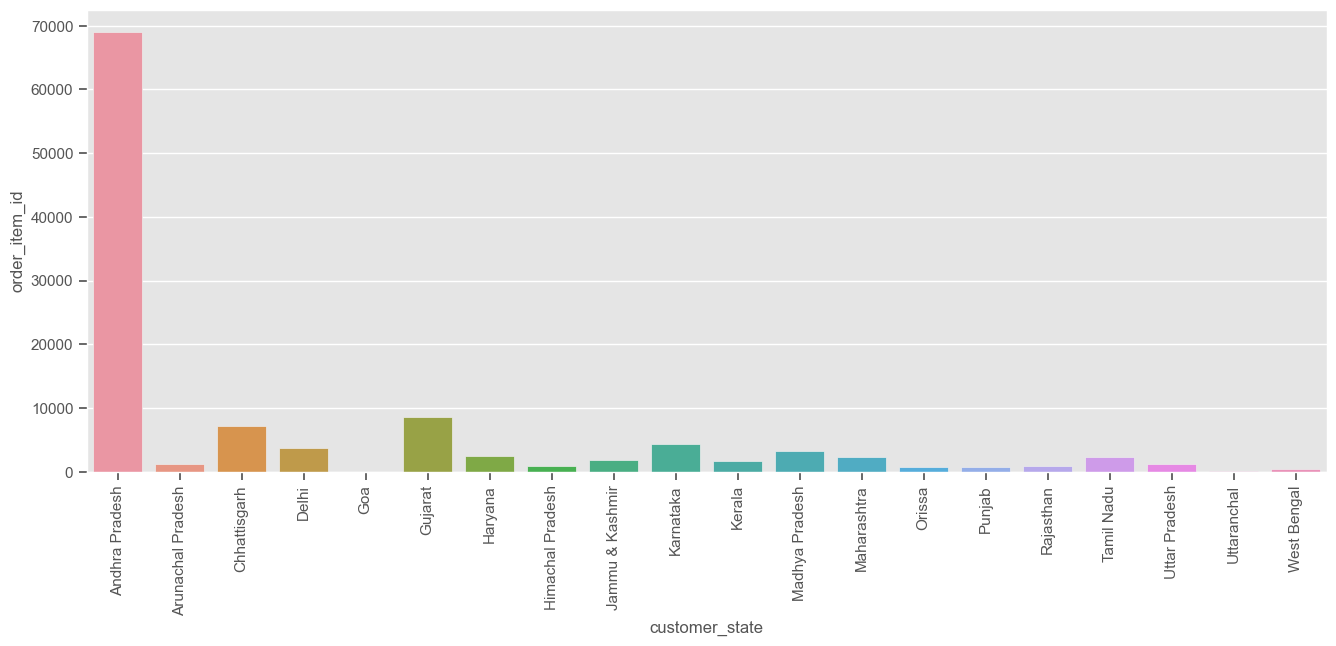

In [28]:
cus_details2=data.groupby('customer_state').order_item_id.count().reset_index()
plt.figure(figsize=(16,6))
sns.barplot(cus_details2.customer_state,cus_details2.order_item_id)
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=90)
plt.show()

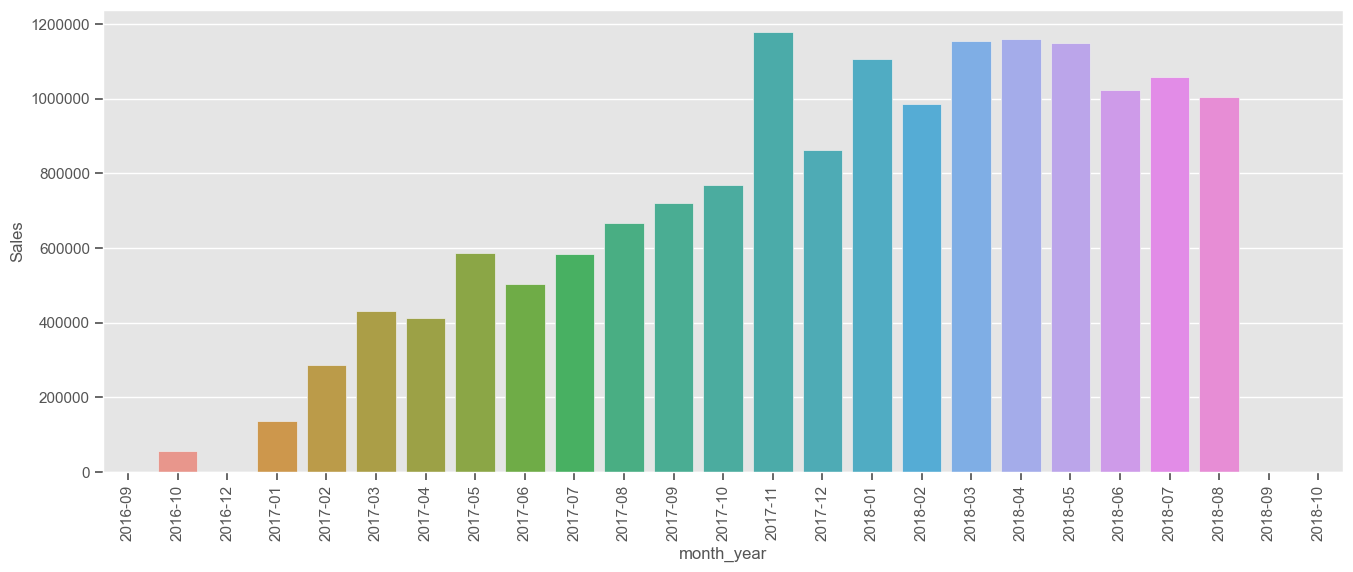

In [29]:
cus_details3=data.groupby('month_year').price_to_pay.sum().reset_index()
plt.figure(figsize=(16,6))
sns.barplot(cus_details3.month_year,cus_details3.price_to_pay)
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

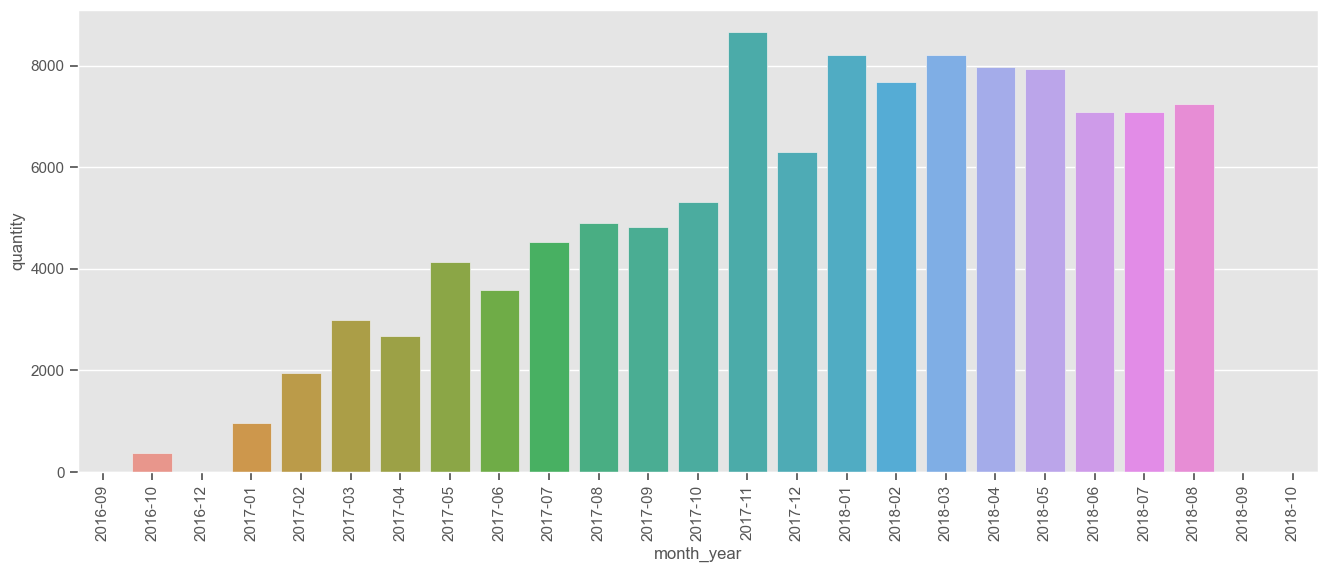

In [30]:
cus_details4=data.groupby('month_year').order_item_id.count().reset_index()
plt.figure(figsize=(16,6))
sns.barplot(cus_details4.month_year,cus_details4.order_item_id)
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel('quantity')
plt.xticks(rotation=90)
plt.show()

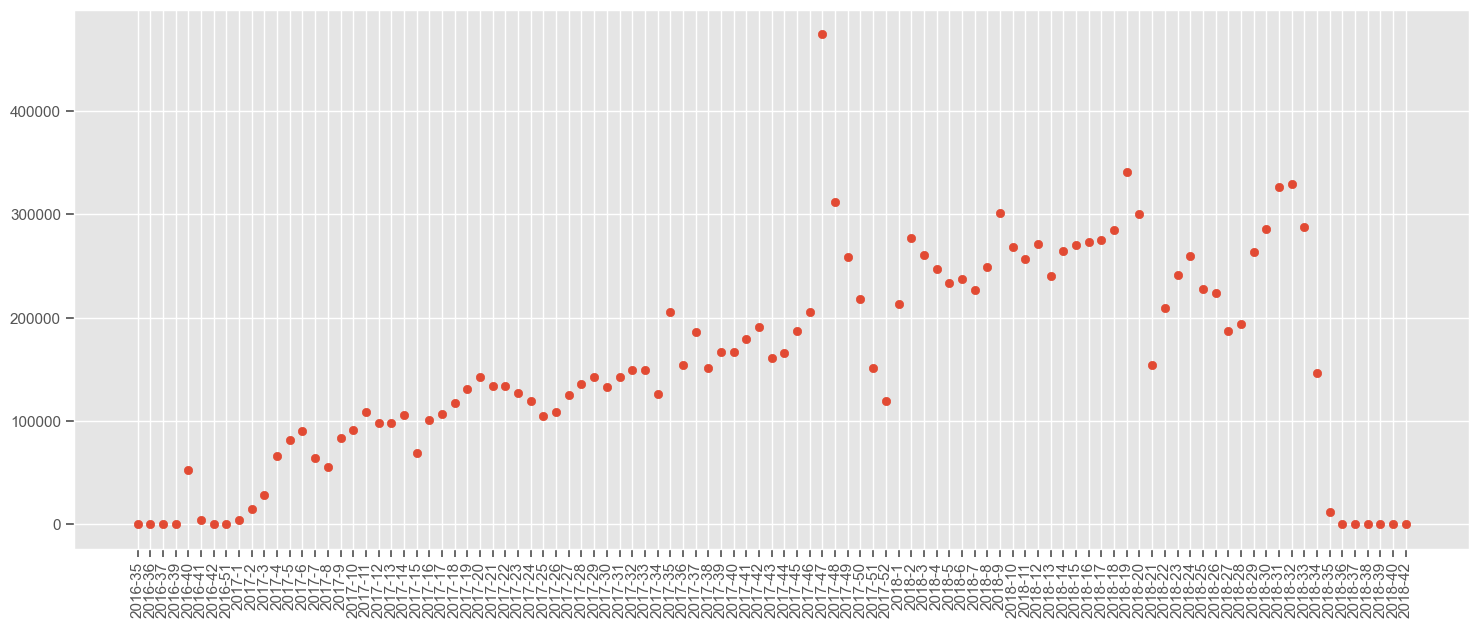

In [32]:
cus_details5=data.groupby(['year','week']).price_to_pay.sum().reset_index()
cus_details5['year_week']=cus_details5.year.astype(str)+'-'+cus_details5.week.astype(str)
plt.figure(figsize=(18,7))
plt.scatter(cus_details5.year_week,cus_details5.price_to_pay)
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=90)
plt.show()

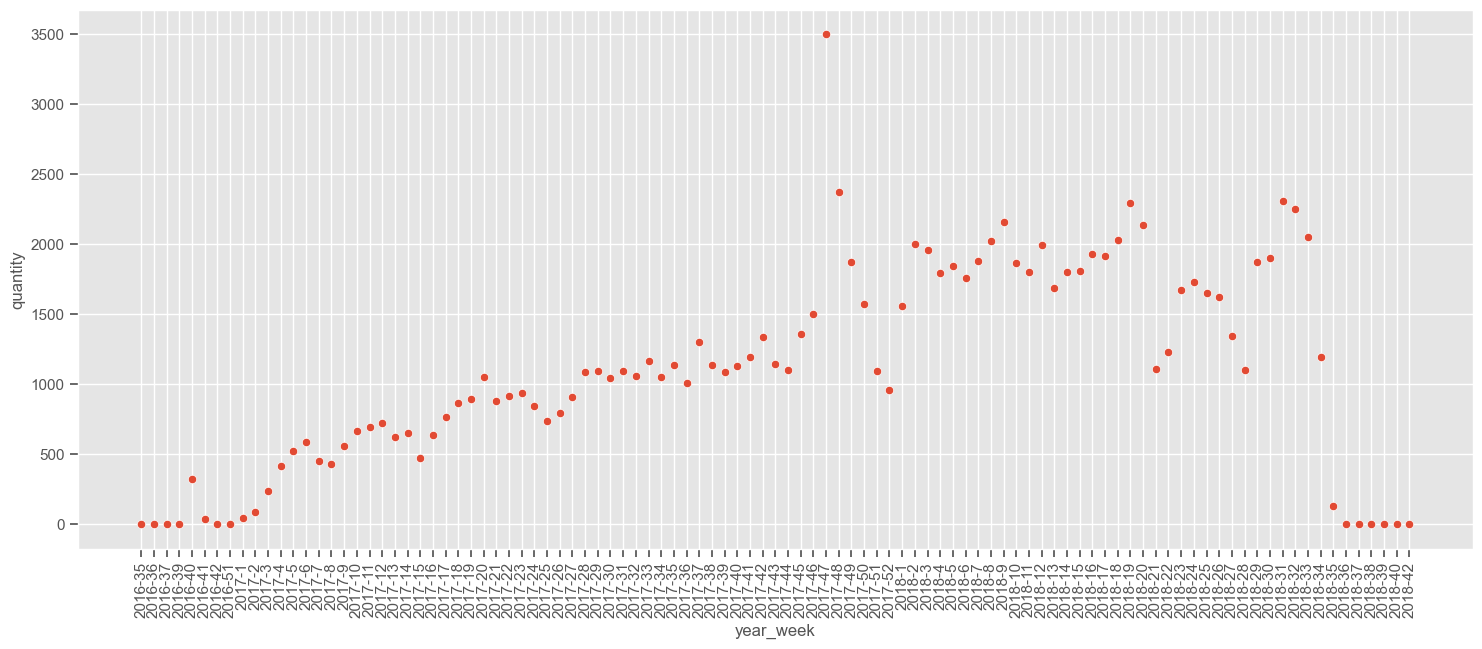

In [33]:
cus_details6=data.groupby(['year','week']).order_item_id.count().reset_index()
cus_details6['year_week']=cus_details6.year.astype(str)+'-'+cus_details6.week.astype(str)
plt.figure(figsize=(18,7))
sns.scatterplot(cus_details6.year_week,cus_details6.order_item_id)
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel('quantity')
plt.xticks(rotation=90)
plt.show()

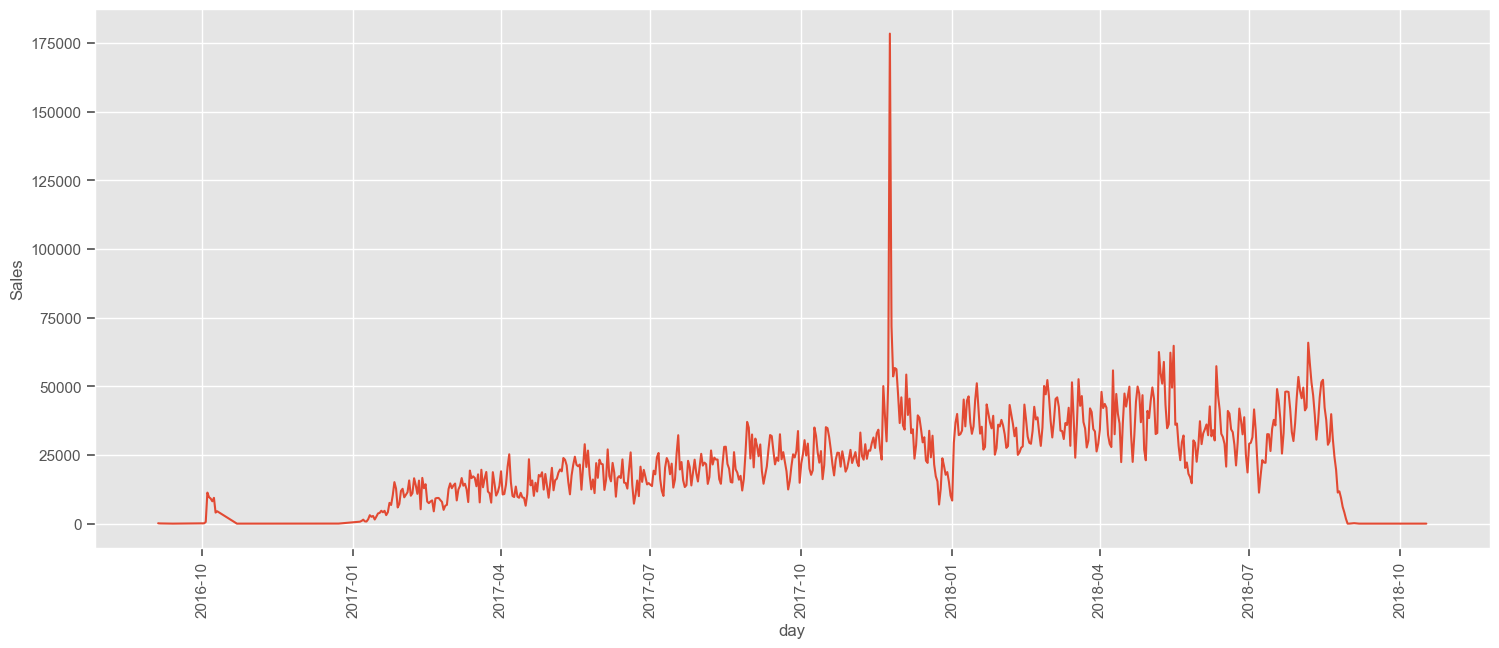

In [34]:
cus_details7=data.groupby('day').price_to_pay.sum().reset_index()
plt.figure(figsize=(18,7))
sns.lineplot(x='day',y='price_to_pay',data=cus_details7)
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

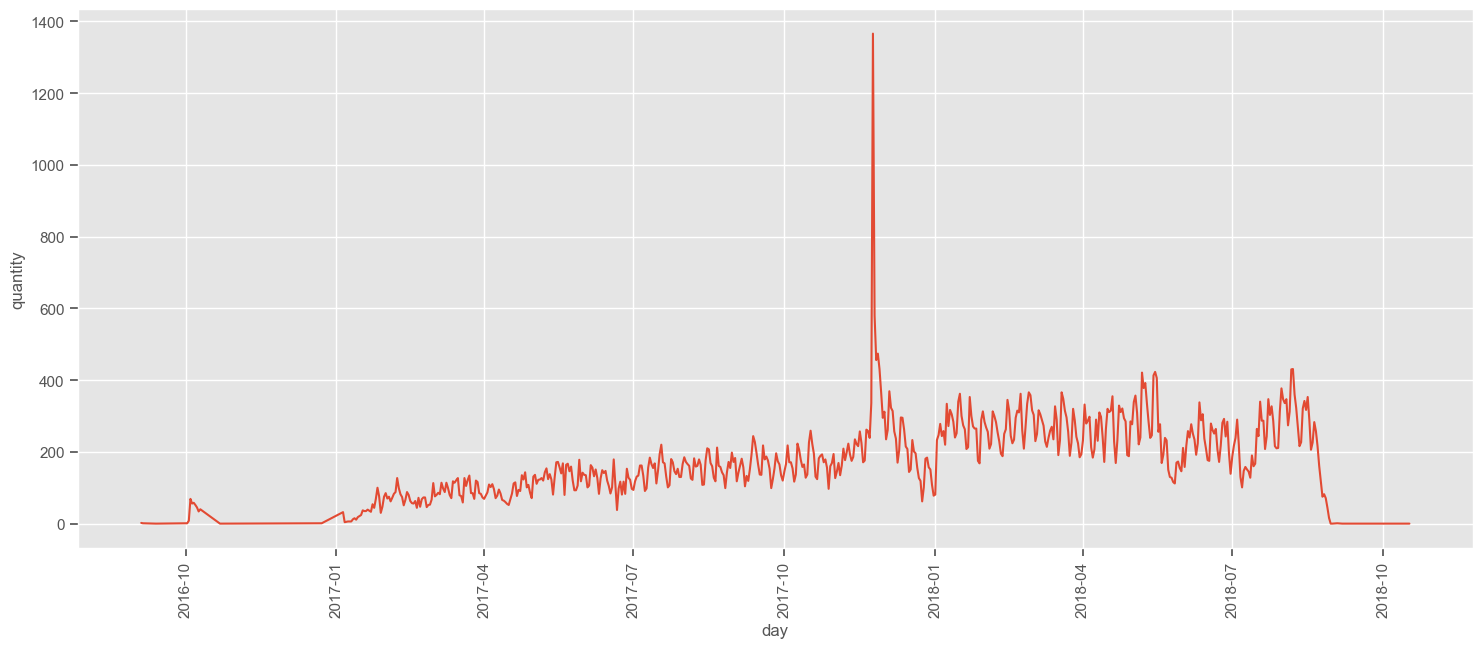

In [35]:
cus_details8=data.groupby('day').order_item_id.count().reset_index()
plt.figure(figsize=(18,7))
sns.lineplot(x='day',y='order_item_id',data=cus_details8)
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel('quantity')
plt.xticks(rotation=90)
plt.show()

In [36]:
order_payments.payment_type.nunique()

5

In [37]:
order_payments.groupby('payment_type').payment_value.sum()

payment_type
UPI            2869361.27
credit_card   12542084.19
debit_card      217989.79
not_defined          0.00
voucher         379436.87
Name: payment_value, dtype: float64

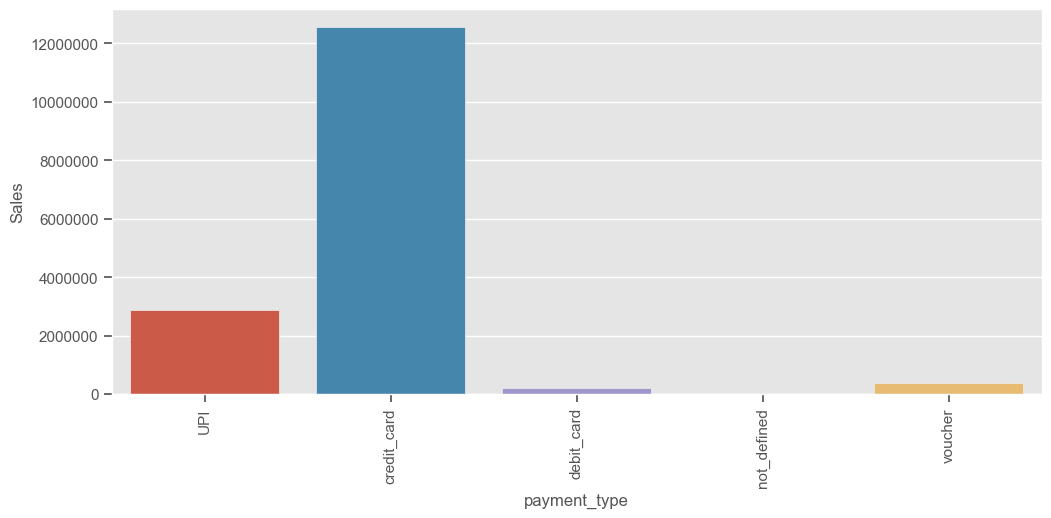

In [38]:
cus_details9=order_payments.groupby('payment_type').payment_value.sum().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(cus_details9.payment_type,cus_details9.payment_value)
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

# f. Popular Products by month, seller, state, category.

In [39]:
pro=data.groupby(['month_year',data.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=['month_year','product_id'],ascending=[True,False])
pro=pro.groupby('month_year').head(5).reset_index(drop=True)
pro[['month_year','product']]

,month_year,product
0,2016-09,c1488892604e4ba5cff5b4eb4d595400
1,2016-09,f293394c72c9b5fafd7023301fc21fc2
2,2016-09,f3c2d01a84c947b078e32bbef0718962
3,2016-10,eba7488e1c67729f045ab43fac426f2e
4,2016-10,d9894482fba41f536a273ba2276d951f
...,...,...
105,2018-08,73326828aa5efe1ba096223de496f596
106,2018-08,19c91ef95d509ea33eda93495c4d3481
107,2018-08,3fbc0ef745950c7932d5f2a446189725
108,2018-08,a92930c327948861c015c919a0bcb4a8


In [40]:
pro2=data.groupby(['seller_id',data.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=['seller_id','product_id'],ascending=[True,False])
pro2=pro2.groupby('seller_id').head(5).reset_index(drop=True)
pro2[['seller_id','product']]

,seller_id,product
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8
1,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e
2,001cca7ae9ae17fb1caed9dfb1094831,e251ebd2858be1aa7d9b2087a6992580
3,001cca7ae9ae17fb1caed9dfb1094831,98a8c2fa16d7239c606640f5555768e4
4,001cca7ae9ae17fb1caed9dfb1094831,0da9ffd92214425d880de3f94e74ce39
...,...,...
10367,ffff564a4f9085cd26170f4732393726,8f7a3322e1abfed89ac080b0f7364779
10368,ffff564a4f9085cd26170f4732393726,96aca2f53bcaed6f466449f7fb18ae75
10369,ffff564a4f9085cd26170f4732393726,c4b925e40f11289063a854c47aaef129
10370,ffff564a4f9085cd26170f4732393726,c5897f6f2d995196dbb40542439da9b9


In [41]:
pro3=data.groupby(['customer_state',data.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=['customer_state','product_id'],ascending=[True,False])
pro3=pro3.groupby('customer_state').head(5).reset_index(drop=True)
pro3[['customer_state','product']]

,customer_state,product
0,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af
1,Andhra Pradesh,99a4788cb24856965c36a24e339b6058
2,Andhra Pradesh,422879e10f46682990de24d770e7f83d
3,Andhra Pradesh,53b36df67ebb7c41585e8d54d6772e08
4,Andhra Pradesh,389d119b48cf3043d311335e499d9c6b
...,...,...
95,West Bengal,99a4788cb24856965c36a24e339b6058
96,West Bengal,30ac6df06dc59ad72cf2f158fc2d904c
97,West Bengal,389d119b48cf3043d311335e499d9c6b
98,West Bengal,ffaf0af7eebb57c7f262b51ebb05dfd6


In [42]:
pro4=data.groupby(['product_category_name',data.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=['product_category_name','product_id'],ascending=[True,False])
pro4=pro4.groupby('product_category_name').head(5).reset_index(drop=True)
pro4[['product_category_name','product']]

,product_category_name,product
0,Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed
1,Agro_Industry_And_Commerce,423a6644f0aa529e8828ff1f91003690
2,Agro_Industry_And_Commerce,672e757f331900b9deea127a2a7b79fd
3,Agro_Industry_And_Commerce,3bebad3cf2c8d1a8d3ce97174643e054
4,Agro_Industry_And_Commerce,a0fe1efb855f3e786f0650268cd77f44
...,...,...
343,Watches_Gifts,53b36df67ebb7c41585e8d54d6772e08
344,Watches_Gifts,a62e25e09e05e6faf31d90c6ec1aa3d1
345,Watches_Gifts,e0d64dcfaa3b6db5c54ca298ae101d05
346,Watches_Gifts,a92930c327948861c015c919a0bcb4a8


# g. Popular categories by state, month

In [43]:
cat=data.groupby(['customer_state',data.product_category_name.rename('category')]).product_category_name.count().reset_index().sort_values(by=['customer_state','product_category_name'],ascending=[True,False])
cat=cat.groupby('customer_state').head(5).reset_index(drop=True)
cat[['customer_state','category']]

,customer_state,category
0,Andhra Pradesh,Bed_Bath_Table
1,Andhra Pradesh,Health_Beauty
2,Andhra Pradesh,Sports_Leisure
3,Andhra Pradesh,Furniture_Decor
4,Andhra Pradesh,Computers_Accessories
...,...,...
95,West Bengal,Health_Beauty
96,West Bengal,Telephony
97,West Bengal,Computers_Accessories
98,West Bengal,Bed_Bath_Table


In [44]:
cat2=data.groupby(['month_year',data.product_category_name.rename('category')]).product_category_name.count().reset_index().sort_values(by=['month_year','product_category_name'],ascending=[True,False])
cat2=cat2.groupby('month_year').head(5).reset_index(drop=True)
cat2[['month_year','category']]

,month_year,category
0,2016-09,Furniture_Decor
1,2016-09,Telephony
2,2016-10,Furniture_Decor
3,2016-10,Health_Beauty
4,2016-10,Perfumery
...,...,...
104,2018-08,Bed_Bath_Table
105,2018-08,Housewares
106,2018-08,Sports_Leisure
107,2018-08,Furniture_Decor


# h. List top 10 most expensive products sorted by price

In [45]:
expensive_product = data.groupby(['product_id'])['price'].mean()
expensive_product.sort_values(ascending = False).head(10).reset_index().product_id

0    489ae2aa008f021502940f251d4cce7f
1    69c590f7ffc7bf8db97190b6cb6ed62e
2    1bdf5e6731585cf01aa8169c7028d6ad
3    a6492cc69376c469ab6f61d8f44de961
4    c3ed642d592594bb648ff4a04cee2747
5    259037a6a41845e455183f89c5035f18
6    a1beef8f3992dbd4cd8726796aa69c53
7    6cdf8fc1d741c76586d8b6b15e9eef30
8    6902c1962dd19d540807d0ab8fade5c6
9    4ca7b91a31637bd24fb8e559d5e015e4
Name: product_id, dtype: object

# 2. Performing Customers/sellers Segmentation 

# a. Divide the customers into groups based on the revenue generated

In [47]:
cus_group=data.groupby('customer_id').price_to_pay.sum().reset_index()
cus_group['Group_number']=pd.qcut(cus_group['price_to_pay'],10,labels=False)
cus_group[['customer_id','Group_number']]

,customer_id,Group_number
0,00012a2ce6f8dcda20d059ce98491703,5
1,000161a058600d5901f007fab4c27140,2
2,0001fd6190edaaf884bcaf3d49edf079,7
3,0002414f95344307404f0ace7a26f1d5,7
4,000379cdec625522490c315e70c7a9fb,5
...,...,...
99435,fffecc9f79fd8c764f843e9951b11341,3
99436,fffeda5b6d849fbd39689bb92087f431,2
99437,ffff42319e9b2d713724ae527742af25,8
99438,ffffa3172527f765de70084a7e53aae8,1


# b. Divide the sellers into groups based on the revenue generated

In [48]:
cus_group2=data.groupby('seller_id').price_to_pay.sum().reset_index()
cus_group2['Group_number']=pd.qcut(cus_group2['price_to_pay'],10,labels=False)
cus_group2[['seller_id','Group_number']]

,seller_id,Group_number
0,0015a82c2db000af6aaaf3ae2ecb0532,6
1,001cca7ae9ae17fb1caed9dfb1094831,9
2,001e6ad469a905060d959994f1b41e4f,2
3,002100f778ceb8431b7a1020ff7ab48f,6
4,003554e2dce176b5555353e4f3555ac8,1
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,0
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,6
3092,ffeee66ac5d5a62fe688b9d26f83f534,6
3093,fffd5413c0700ac820c7069d66d98c89,9


In [49]:
data.product_id.nunique()

32951

# 3. Cross-Selling (Which products are selling together)

In [50]:
cross_selling=data.groupby(['order_id','product_id']).order_item_id.count().reset_index()
cross_selling=pd.crosstab(data.order_id,data.product_category_name)
function=lambda x: True if x>0 else False
for i in cross_selling.columns:
    cross_selling[i]=cross_selling[i].apply(function)
cross_selling.head()

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
00018f77f2f0320c557190d7a144bdd3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
000229ec398224ef6ca0657da4fc703e,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
00024acbcdf0a6daa1e931b038114c75,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
00042b26cf59d7ce69dfabb4e55b4fd9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 4. Payment Behaviour 


# a. How customers are paying?

In [51]:
pay['payment_type'].value_counts()

credit_card    76795
UPI            19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

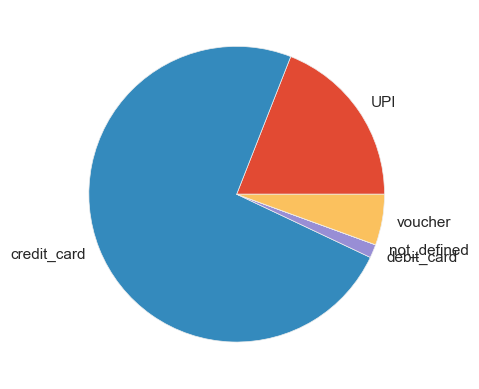

In [52]:
payment_behaviour=order_payments.merge(orders,on='order_id')
a4=payment_behaviour.groupby('payment_type').customer_id.count().reset_index()
plt.pie(a4.customer_id,labels=a4.payment_type)
plt.show()

# b. Which payment channels are used by most customers?

<AxesSubplot:xlabel='payment_type'>

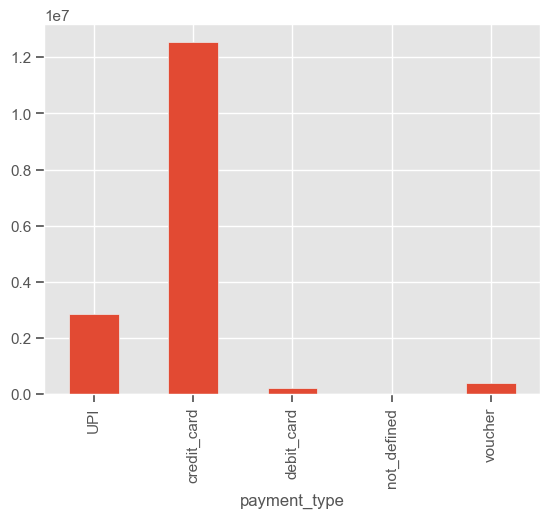

In [53]:
payment_behaviour.groupby('payment_type').payment_value.sum().plot.bar()

# 5. Customer satisfaction towards category & product

# a. Which categories (top 10) are maximum rated & minimum rated?



In [54]:
rating=data.groupby('product_category_name').review_score.mean().reset_index().sort_values(by='review_score')
rating.head(10)

,product_category_name,review_score
61,Security_And_Services,2.50
23,Diapers_And_Hygiene,3.26
46,Home_Comfort_2,3.37
57,Office_Furniture,3.48
30,Fashion_Male_Clothing,3.62
34,Fixed_Telephony,3.67
58,Party_Supplies,3.77
27,Fashio_Female_Clothing,3.78
52,La_Cuisine,3.79
4,Audio,3.81


In [55]:
rating.tail(10)

,product_category_name,review_score
32,Fashion_Sport,4.23
37,Food_Drink,4.30
64,Small_Appliances_Home_Oven_And_Coffee,4.30
53,Luggage_Accessories,4.31
10,Books_Technical,4.33
22,Costruction_Tools_Tools,4.36
9,Books_Imported,4.40
8,Books_General_Interest,4.44
29,Fashion_Childrens_Clothes,4.50
11,Cds_Dvds_Musicals,4.64


# b. Which products (top10) are maximum rated & minimum rated?

In [58]:
top10 = rating.groupby(['product_category_name'])[['review_score']].count().sort_values(by='review_score',ascending=False)
top10.head()

,review_score
product_category_name,
Agro_Industry_And_Commerce,1
Home_Appliances_2,1
Kitchen_Dining_Laundry_Garden_Furniture,1
Industry_Commerce_And_Business,1
Housewares,1


In [59]:
top10.tail()

,review_score
product_category_name,
Diapers_And_Hygiene,1
Costruction_Tools_Tools,1
Costruction_Tools_Garden,1
Cool_Stuff,1
Watches_Gifts,1


# c. Average rating by location, seller, product, category, month etc.

In [63]:
data1=data.groupby(['order_id','customer_id']).last().reset_index()
data1.groupby('customer_state').review_score.mean().reset_index()

,customer_state,review_score
0,Andhra Pradesh,4.05
1,Arunachal Pradesh,4.11
2,Chhattisgarh,4.09
3,Delhi,4.06
4,Goa,4.80
5,Gujarat,4.08
6,Haryana,4.15
7,Himachal Pradesh,4.02
8,Jammu & Kashmir,4.08
9,Karnataka,4.07


In [64]:
data2=data.groupby(['order_id','product_id','seller_id']).last().reset_index()
data2.groupby('seller_id').review_score.mean().reset_index()

,seller_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,3.67
1,001cca7ae9ae17fb1caed9dfb1094831,3.94
2,001e6ad469a905060d959994f1b41e4f,1.00
3,002100f778ceb8431b7a1020ff7ab48f,3.98
4,003554e2dce176b5555353e4f3555ac8,5.00
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,1.00
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,4.33
3092,ffeee66ac5d5a62fe688b9d26f83f534,4.21
3093,fffd5413c0700ac820c7069d66d98c89,3.87


In [65]:
data3=data.groupby(['order_id','product_id']).last().reset_index()
data3.groupby('product_id').review_score.mean().reset_index()

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.00
1,00088930e925c41fd95ebfe695fd2655,4.00
2,0009406fd7479715e4bef61dd91f2462,1.00
3,000b8f95fcb9e0096488278317764d19,5.00
4,000d9be29b5207b54e86aa1b1ac54872,5.00
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,4.50
32947,fff81cc3158d2725c0655ab9ba0f712c,4.00
32948,fff9553ac224cec9d15d49f5a263411f,5.00
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,5.00


In [66]:
data4=data.groupby(['order_id','product_id']).last().reset_index()
data4.groupby('product_category_name').review_score.mean().reset_index()

,product_category_name,review_score
0,Agro_Industry_And_Commerce,4.03
1,Air_Conditioning,3.98
2,Art,4.00
3,Arts_And_Craftmanship,4.12
4,Audio,3.82
...,...,...
66,Stationery,4.22
67,Tablets_Printing_Image,4.08
68,Telephony,3.97
69,Toys,4.16


In [67]:
data5=data.groupby(['order_id','product_id']).last().reset_index()
data5.groupby('month_year').review_score.mean().reset_index()

,month_year,review_score
0,2016-09,1.00
1,2016-10,3.60
2,2016-12,5.00
3,2017-01,4.06
4,2017-02,4.05
5,2017-03,4.08
6,2017-04,4.03
7,2017-05,4.14
8,2017-06,4.13
9,2017-07,4.16
